In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#creating the independent and the dependent feature
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [6]:
#splitting the dataset into training and the testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279,19.2,396.90,8.77
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241,18.2,341.60,12.93
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
493,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47


In [8]:
#create the linear regression model
model=LinearRegression()
#train the model into training data
model.fit(x_train,y_train)
#use the trained model to predict the target values in the test set
y_pred=model.predict(x_test)

In [9]:
#Calculate the mean squared error of the model on the test set
mse=mean_squared_error(y_test,y_pred)
print('Mean squared error:',mse)
r2=r2_score(y_test,y_pred)
print('R2score:',r2)

Mean squared error: 18.495420122448426
R2score: 0.7789207451814414


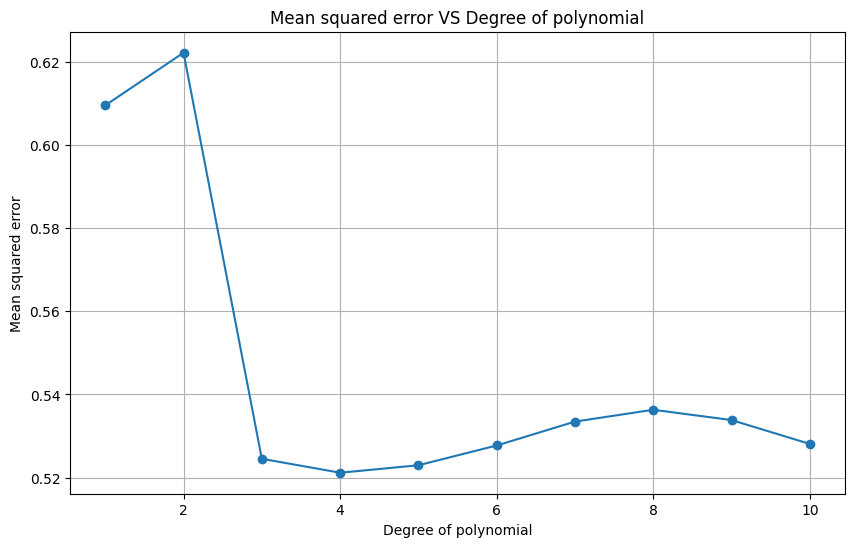

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
#Load the Auto MPG dataset
url='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
col_names=['MPG','Cylinders','Displacement','Horsepower','weight','Acceleration','model year','Origin']
auto_mpg=pd.read_csv(url,names=col_names,delim_whitespace=True,na_values='?')
#drop rows with missing values
auto_mpg=auto_mpg.dropna()
#define feature and the target
features=auto_mpg[['Horsepower']] #only use horsepower as feature
target=auto_mpg['MPG']
#list of the polynomial degress
degrees=list(range(1,11)) #Extend degrees to 10
#Split the dataset into a training set and a test set
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=4)
#List to store mean squared error
mse_list=[]
for degree in degrees:
    #add polynomial feature
    poly=PolynomialFeatures(degree=degree)
    x_train_poly=poly.fit_transform(x_train)
    x_test_poly=poly.transform(x_test)
    #create a linear regression model
    model=LinearRegression()
    #Train the model on the polynomial feature training data
    model.fit(x_train_poly,y_train)
    #use the trained model to predict the target values in the test set
    y_pred=model.predict(x_test_poly)
    #calculate the mean squared error of the model on the test set
    mse=mean_squared_error(y_test,y_pred)
    #store the mean squared error in the list
    mse_list.append(mse)
    
#plot the mean squared error as a function of the degree of the polynomial
plt.figure(figsize=(10,6))
plt.plot(degrees,mse_list,marker='o')
plt.title('Mean squared error VS Degree of polynomial')
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.grid(True)
plt.show()

In [11]:
auto_mpg

,MPG,Cylinders,Displacement,Horsepower,weight,Acceleration,model year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...
27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [12]:
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#load the dateset
mnist=fetch_openml('mnist_784',version=1)
X,y=mnist.data,mnist.target
#split the dataset into training set and the test set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

model=DecisionTreeClassifier()

#train the model on the training data
model.fit(x_train,y_train)
#use the trained model to predict the target values in the test set
y_pred_test=model.predict(x_test)
#calculate the accuracy of the model on the training and test sets
accuracy_test=accuracy_score(y_test,y_pred_test)
print("Test accuracy:",accuracy_test)

C:\Users\yakle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Test accuracy: 0.8695


Leave One Out Cross validation (LOOCV)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut,cross_val_score

#Load the Boston Housing dataset
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
#creating the independent and the dependent feature
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

#Create a linear regression model
model=LinearRegression()

#crate a leaveoneout crossvalidation
loo=LeaveOneOut()
#Use cross_val_score for the dataset with the model and LOOCV
#This will return the scores for each iteration of LOOCV
scores=cross_val_score(model,x,y,cv=loo,scoring='neg_mean_squared_error')
mse_scores=-scores #Invert the sign of the squares
#print the mean MSE over all LOOCV iterations
print("Mean MSE:",mse_scores.mean())

Mean MSE: 23.725745519476153


In [14]:
scores

array([-3.72979719e+01, -1.19996083e+01, -1.74878280e+01, -2.37110133e+01,
       -7.04199800e+01, -1.22185247e+01, -1.06607826e-02, -6.08323283e+01,
       -2.76061960e+01, -4.35492529e-04, -1.71891129e+01, -7.57242810e+00,
       -6.52257805e-01, -7.37772576e-01, -1.20890968e+00, -3.73396196e-01,
       -6.92394876e+00, -3.54752744e-01, -1.69701375e+01, -4.35547121e-02,
       -1.20164044e+00, -3.82170339e+00, -4.13536519e-01, -4.99399777e-01,
       -6.33146773e-03, -2.72147161e-01, -1.33111630e+00, -8.65299886e-03,
       -1.36231825e+00, -1.57472599e-02, -1.61151928e+00, -1.31345333e+01,
       -2.06757013e+01, -1.44397569e+00, -4.47571447e-02, -2.46360177e+01,
       -5.59248522e+00, -4.55268647e+00, -3.28660467e+00, -3.31240848e-01,
       -5.01414236e-01, -2.13097952e+00, -9.67926125e-03, -8.52754852e-03,
       -3.10007107e+00, -8.03207324e+00, -1.84421470e-01, -2.15724847e+00,
       -3.10857366e+01, -4.97324456e+00, -2.56665919e+00, -1.24320814e+01,
       -7.23742751e+00, -

In [15]:
x.shape

(506, 13)

In [16]:
from sklearn.model_selection import KFold
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
#Initialize the Linear Regression model
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
#use cross val score on the model and the dataset
scores=cross_val_score(model,x,y,cv=kfold,scoring='r2')
print("R2 scores for each fold:",scores)
print("Mean R2 score across all folds:",scores.mean())

R2 scores for each fold: [0.75981355 0.60908125 0.76975858 0.71639463 0.61663293 0.79789535
 0.76682601 0.79453027 0.74066667 0.59908146]
Mean R2 score across all folds: 0.7170680714871457


Stratified K Fold

In [18]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,cross_val_score
#load iris dataset
data=load_iris()
x,y=data.data,data.target
#create the logistics regression model
model=LogisticRegression(max_iter=1000,random_state=42)
#Create StratifiedKfold objects
skf=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perform the stratfied crossvalidation
scores=cross_val_score(model,x,y,cv=skf,scoring='accuracy')
#print the accuracy for each fold
print("Accuracies for each fold:",scores)
print("Mean accuracy across all folds:",scores.mean())

Accuracies for each fold: [1.         0.96666667 0.93333333 1.         0.93333333]
Mean accuracy across all folds: 0.9666666666666668
